In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
num_pos_points = 50

n = np.linspace(start=-num_pos_points, stop=num_pos_points, 
                num=2 * num_pos_points + 1, endpoint=True)
m = np.linspace(start=-num_pos_points, stop=num_pos_points, 
                num=2 * num_pos_points + 1, endpoint=True)
nn, mm = np.meshgrid(n, m)

colors = np.where(
    np.logical_and(
        np.ravel(nn) + np.ravel(mm) >= -num_pos_points, 
        np.ravel(nn) + np.ravel(mm) <=  num_pos_points), 
    "navy", "darkred")

mask = np.where(np.logical_and(
    np.ravel(nn) + np.ravel(mm) >= -num_pos_points, 
    np.ravel(nn) + np.ravel(mm) <=  num_pos_points))

cartesian_points_x = np.ravel(nn + 0.5 * mm)  
cartesian_points_y = np.ravel(0.86602540378 * mm) 

del nn, mm

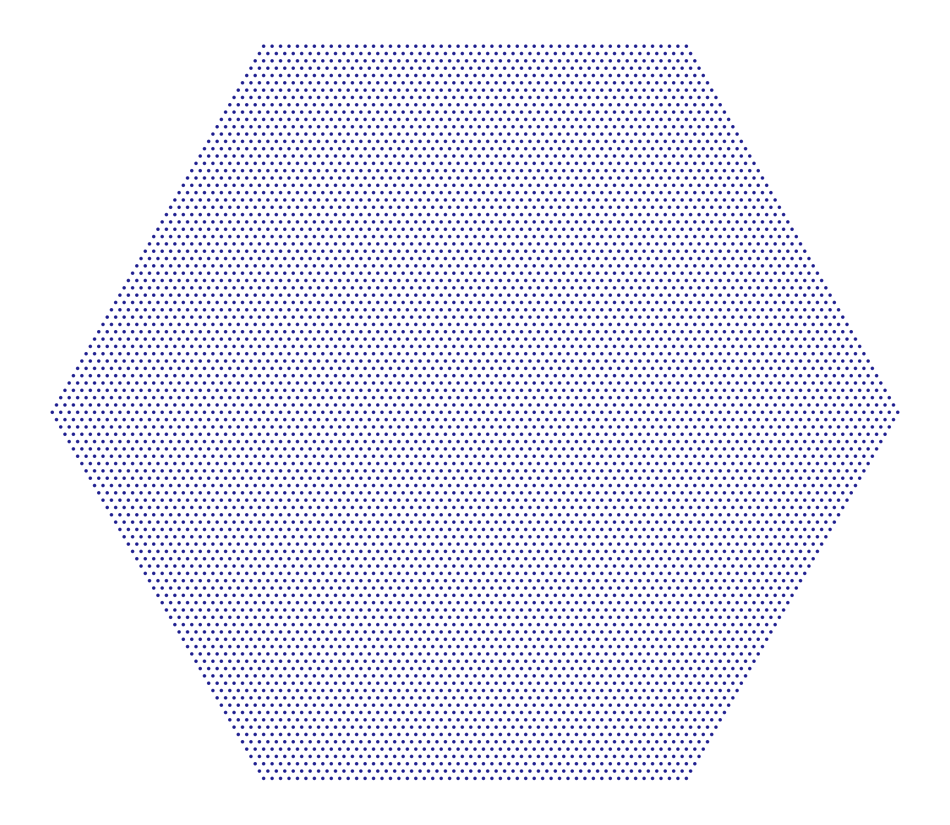

In [7]:
fig = plt.figure(figsize=(12.0, 12.0))
ax = fig.gca()

ax.scatter(cartesian_points_x[mask], cartesian_points_y[mask], 
           s=2.5, marker="o", color=colors[mask], alpha=0.75)
#
ax.axis("off")
# xlims = ax.get_xlim()
# ylims = ax.get_ylim()
# ax.hlines(y=0.0, xmin=xlims[0], xmax=xlims[1], lw=0.5, color="darkgrey")
# ax.vlines(x=0.0, ymin=ylims[0], ymax=ylims[1], lw=0.5, color="darkgrey")
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)
# ax.grid()
#
ax.set_aspect("equal")

plt.show()

# Gnomonic Projection:

$$
\begin{cases}
    r &= \sin(\arctan(\sqrt{x^2 + y^2}))\\
    \theta &= \text{slop}(x, y)
\end{cases}
$$

$$
\text{slop}(x, y) \,=\,
\begin{cases}
    \arctan{\frac{x}{y}} \quad x > 0 \text{and} y > 0\\
    \pi + \arctan{\frac{x}{y}} \quad x < 0 \\
    \arctan{\frac{x}{y}} \quad x > 0 \text{and} y < 0\\
    \frac{\pi}{2}\text{sign}(y) \quad x = 0\\
\end{cases}
$$

In [8]:
projected_r = np.sin(np.arctan(0.5 * np.sqrt(
    np.square(cartesian_points_x) + np.square(cartesian_points_y)
)))

arctan_xy = np.where(
    cartesian_points_x == 0.0,
    np.where(cartesian_points_y == 0.0, 0.0, 0.5 * np.pi * np.sign(cartesian_points_y)),
    np.arctan(cartesian_points_y / cartesian_points_x)
)
projected_t = np.where(
    cartesian_points_x >= 0, 
    np.where(cartesian_points_y >= 0, arctan_xy, arctan_xy + 2.0 * np.pi),
    np.pi + arctan_xy
)

/var/folders/jd/xzt2qvgj0h3525l8xwj_wgwh0000gn/T/ipykernel_13036/1695336045.py:8: RuntimeWarning: divide by zero encountered in divide
  np.arctan(cartesian_points_y / cartesian_points_x)
/var/folders/jd/xzt2qvgj0h3525l8xwj_wgwh0000gn/T/ipykernel_13036/1695336045.py:8: RuntimeWarning: invalid value encountered in divide
  np.arctan(cartesian_points_y / cartesian_points_x)


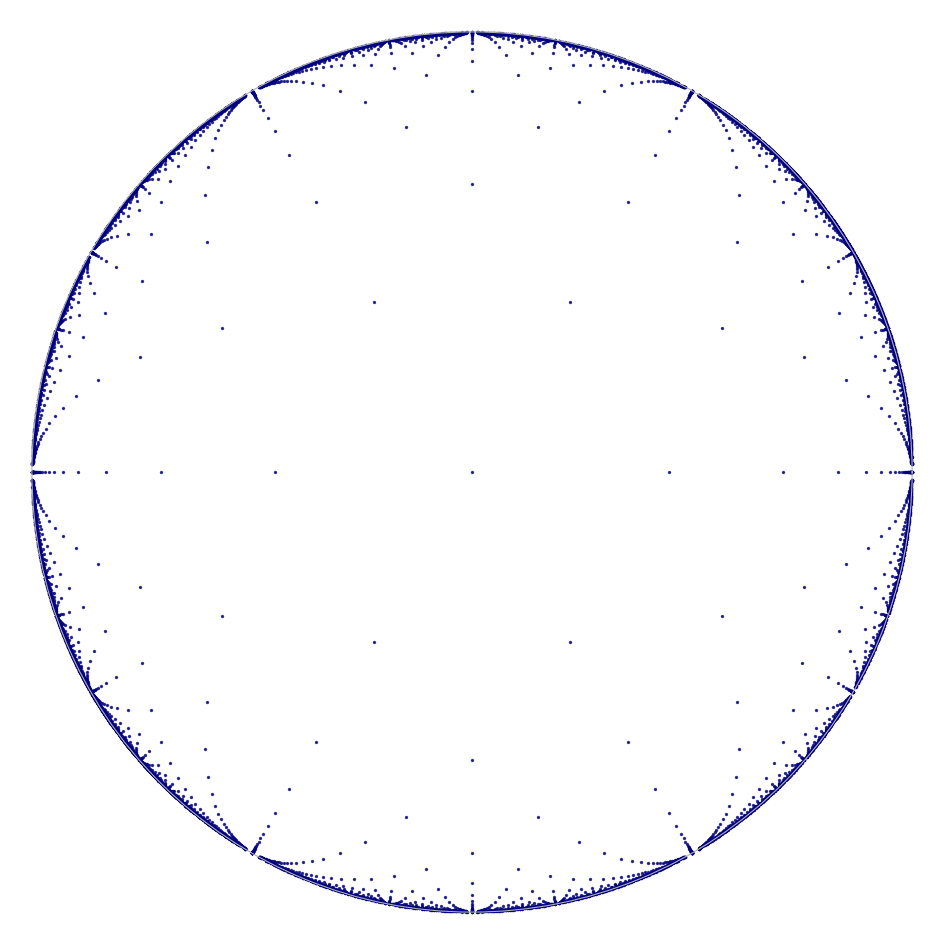

In [9]:
fig = plt.figure(figsize=(12.0, 12.0))

ax = fig.subplots(subplot_kw={'projection': 'polar'})

ax.scatter(projected_t, projected_r, 
           s=2.0, marker="o", color="navy", alpha=0.75)
# ax.set_rmax(2)
ax.set_rticks([1.0])  
ax.set_yticklabels([])
ax.set_xticks([])  
ax.spines['polar'].set_visible(False)
ax.set_aspect("equal")
# ax.axis("off")

plt.show()